In [20]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from PIL import Image
import os
import sys
from model import predict_img
sys.path.append("../main/")
from unet import UNet
import cv2

In [4]:
TRAIN_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/"
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
VALIDATION_FILE_ROOT = ""

In [10]:
print(os.listdir(TEST_FILE_ROOT))

['a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f', 'a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d', 'ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8', 'ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e', 'b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3', 'bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d', 'c8e79ff4ac55f4b772057de28e539727b7f4f2a3de73bf7a082a0ace86d609eb', 'ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef', 'd616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d', 'd6eb7ce7723e2f6dc13b90b41a29ded27dbd815bad633fdf582447c686018896', 'd8d4bf68a76e4e4c5f21de7ac613451f7115a04db686151e78b8ec0b6a22022b', 'da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab', 'dab46d798d29aff2e99c23f47ed3064f5cafb1644629b015c95a2dd2ee593bb4', 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8', 'e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d8

In [95]:
def show_prediction(filename, test=True):
    if test:
        original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
        predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
    else:
        pass
    original_image_array = np.asarray(original_image)
    predicted_mask_array = np.asarray(predicted_mask)
    
    im2, contours, hierarchy = cv2.findContours(predicted_mask_array, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    dst = cv2.drawContours(original_image_array, contours, -1, (255, 0, 0), 1)
    return Image.fromarray(dst)

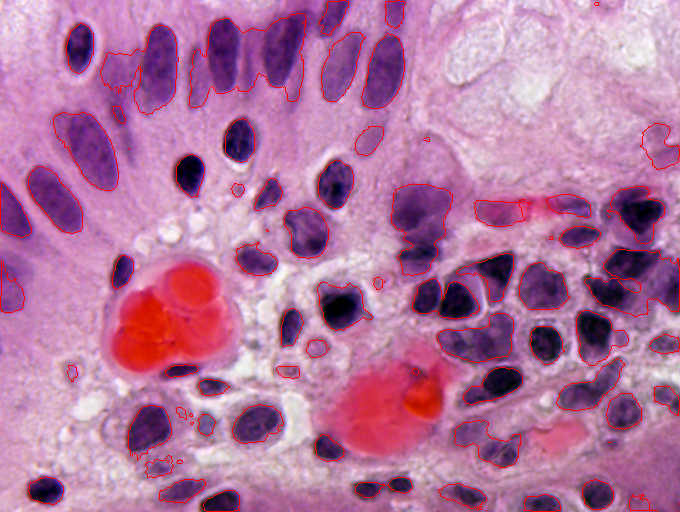

In [99]:
filename = 'a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f'
#filename = 'a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d'
#filename = '44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078'
filename = '472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71'
dst = show_test_prediction(filename)
dst